In [1]:
!pip install keras

In [2]:
#Librerias
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2
import random
from shutil import rmtree
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.callbacks import TensorBoard
from keras.utils import to_categorical
#from keras_preprocessing.image import load_img, img_to_array, array_to_img, save_img

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#NHS TIPO NIC1 SEG
#307
image_ids_array = ['I264211_C1.jpg', 'I169320_C2.jpg', 'I166612_C1.jpg', 'I169320_C1.jpg', 'I166612_C2.jpg', 'I150818_C2.jpg', 'I150818_C1.jpg', 'I149745_C2.jpg', 'I149745_C1.jpg', 'I133591_C2.jpg', 'I126100_C1.jpg', 'I133591_C1.jpg', 'I126100_C2.jpg', 'I124361_C1.jpg', 'I103738_C1.jpg', 'I103738_C2.jpg', 'I124361_C2.jpg', 'I124032_C2.jpg', 'I124032_C1.jpg', 'I264211_C2.jpg', 'I342192_C2.jpg', 'I342192_C1.jpg', 'I339977_C2.jpg', 'I335731_C2.jpg', 'I326517_C1.jpg', 'I324210_C2.jpg', 'I339977_C1.jpg', 'I335731_C1.jpg', 'I326517_C2.jpg', 'I324210_C1.jpg', 'I298042_C2.jpg', 'I295650_C1.jpg', 'I295650_C2.jpg', 'I293440_C1.jpg', 'I274386_C2.jpg', 'I293440_C2.jpg', 'I313616_C2.jpg', 'I298042_C1.jpg', 'I313616_C1.jpg', 'I274386_C1.jpg', 'I522521_C1.jpg', 'I517492_C2.jpg', 'I493937_C1.jpg', 'I493937_C2.jpg', 'I517492_C1.jpg', 'I505766_C2.jpg', 'I505766_C1.jpg', 'I474789_C1.jpg', 'I478042_C1.jpg', 'I478042_C2.jpg', 'I474789_C2.jpg', 'I466728_C2.jpg', 'I466728_C1.jpg', 'I437637_C1.jpg', 'I437637_C2.jpg', 'I371059_C2.jpg', 'I368134_C2.jpg', 'I368134_C1.jpg', 'I371059_C1.jpg', 'I352381_C2.jpg', 'I352381_C1.jpg', 'I635482_C1.jpg', 'I633710_C1.jpg', 'I633710_C2.jpg', 'I630618_C1.jpg', 'I630618_C2.jpg', 'I608976_C2.jpg', 'I608935_C1.jpg', 'I608976_C1.jpg', 'I608935_C2.jpg', 'I595301_C2.jpg', 'I592231_C2.jpg', 'I592231_C1.jpg', 'I595301_C1.jpg', 'I584458_C1.jpg', 'I584458_C2.jpg', 'I580816_C1.jpg', 'I580149_C1.jpg', 'I580816_C2.jpg', 'I580149_C2.jpg', 'I545787_C2.jpg', 'I579989_C1.jpg', 'I535966_C2.jpg', 'I545787_C1.jpg', 'I579989_C2.jpg', 'I535966_C1.jpg', 'I527027_C1.jpg', 'I527027_C2.jpg', 'I522521_C2.jpg', 'I743469_C1.jpg', 'I743435_C2.jpg', 'I704275_C2.jpg', 'I743333_C1.jpg', 'I677963_C1.jpg', 'I702418_C1.jpg', 'I691209_C2.jpg', 'I743333_C2.jpg', 'I702418_C2.jpg', 'I704275_C1.jpg', 'I691209_C1.jpg', 'I677963_C2.jpg', 'I662039_C1.jpg', 'I643611_C1.jpg', 'I672531_C1.jpg', 'I662039_C2.jpg', 'I672531_C2.jpg', 'I668441_C2.jpg', 'I668441_C1.jpg', 'I643611_C2.jpg', 'I635482_C2.jpg', 'I743893_C1.jpg', 'I743892_C2.jpg', 'I743892_C1.jpg', 'I743874_C1.jpg', 'I743834_C2.jpg', 'I743874_C2.jpg', 'I743834_C1.jpg', 'I743827_C2.jpg', 'I743714_C2.jpg', 'I743827_C1.jpg', 'I743704_C2.jpg', 'I743635_C2.jpg', 'I743624_C1.jpg', 'I743624_C2.jpg', 'I743635_C1.jpg', 'I743507_C1.jpg', 'I743507_C2.jpg', 'I743622_C2.jpg', 'I743550_C1.jpg', 'I743622_C1.jpg', 'I743476_C2.jpg', 'I744362_C1.jpg', 'I744351_C1.jpg', 'I744351_C2.jpg', 'I744335_C2.jpg', 'I744345_C2.jpg', 'I744345_C1.jpg', 'I744294_C2.jpg', 'I744335_C1.jpg', 'I744294_C1.jpg', 'I744206_C2.jpg', 'I744175_C1.jpg', 'I744206_C1.jpg', 'I744114_C2.jpg', 'I744131_C1.jpg', 'I744175_C2.jpg', 'I744129_C1.jpg', 'I744131_C2.jpg', 'I744129_C2.jpg', 'I744114_C1.jpg', 'I744029_C2.jpg', 'I743893_C2.jpg', 'I743951_C2.jpg', 'I743951_C1.jpg', 'I744029_C1.jpg', 'I744074_C2.jpg', 'I744074_C1.jpg', 'I744068_C2.jpg', 'I744068_C1.jpg', 'I744722_C1.jpg', 'I744694_C2.jpg', 'I744691_C2.jpg', 'I744694_C1.jpg', 'I744691_C1.jpg', 'I744599_C2.jpg', 'I744606_C2.jpg', 'I744606_C1.jpg', 'I744624_C2.jpg', 'I744624_C1.jpg', 'I744599_C1.jpg', 'I744548_C2.jpg', 'I744457_C2.jpg', 'I744443_C2.jpg', 'I744472_C2.jpg', 'I744457_C1.jpg', 'I744548_C1.jpg', 'I744406_C2.jpg', 'I744472_C1.jpg', 'I744406_C1.jpg', 'I744443_C1.jpg', 'I744362_C2.jpg', 'I745157_C1.jpg', 'I745139_C2.jpg', 'I745136_C2.jpg', 'I745139_C1.jpg', 'I745136_C1.jpg', 'I745096_C2.jpg', 'I745085_C2.jpg', 'I745092_C2.jpg', 'I745096_C1.jpg', 'I745092_C1.jpg', 'I745024_C2.jpg', 'I745047_C2.jpg', 'I745047_C1.jpg', 'I745085_C1.jpg', 'I745024_C1.jpg', 'I744912_C2.jpg', 'I744912_C1.jpg', 'I744778_C2.jpg', 'I744751_C2.jpg', 'I744751_C1.jpg', 'I744722_C2.jpg', 'I744732_C2.jpg', 'I744778_C1.jpg', 'I744732_C1.jpg', 'I745824_C2.jpg', 'I745838_C2.jpg', 'I745838_C1.jpg', 'I745847_C1.jpg', 'I745796_C1.jpg', 'I745824_C1.jpg', 'I745791_C2.jpg', 'I745796_C2.jpg', 'I745756_C1.jpg', 'I745743_C1.jpg', 'I745709_C1.jpg', 'I745308_C1.jpg', 'I745543_C1.jpg', 'I745308_C2.jpg', 'I745562_C1.jpg', 'I745484_C2.jpg', 'I745290_C1.jpg', 'I745266_C1.jpg', 'I745290_C2.jpg', 'I745266_C2.jpg', 'I745232_C2.jpg', 'I745157_C2.jpg', 'I745165_C2.jpg', 'I745165_C1.jpg', 'I745232_C1.jpg', 'I746524_C1.jpg', 'I746431_C1.jpg', 'I746360_C2.jpg', 'I746360_C1.jpg', 'I746308_C2.jpg', 'I746308_C1.jpg', 'I746274_C2.jpg', 'I746259_C1.jpg', 'I746123_C1.jpg', 'I746123_C2.jpg', 'I746174_C2.jpg', 'I746072_C1.jpg', 'I746035_C2.jpg', 'I746035_C1.jpg', 'I746072_C2.jpg', 'I745983_C2.jpg', 'I745930_C2.jpg', 'I745957_C1.jpg', 'I745930_C1.jpg', 'I745847_C2.jpg', 'I745886_C2.jpg', 'I745957_C2.jpg', 'I745983_C1.jpg', 'I745964_C2.jpg', 'I745964_C1.jpg', 'I745886_C1.jpg', 'I750994_C1.jpg', 'I747684_C1.jpg', 'I751566_C1.jpg', 'I751566_C2.jpg', 'I753457_C1.jpg', 'I750994_C2.jpg', 'I753457_C2.jpg', 'I747104_C2.jpg', 'I747104_C1.jpg', 'I747028_C2.jpg', 'I746771_C2.jpg', 'I746614_C2.jpg', 'I746614_C1.jpg', 'I746692_C2.jpg', 'I746596_C1.jpg', 'I746556_C1.jpg', 'I746566_C2.jpg', 'I746692_C1.jpg', 'I746556_C2.jpg', 'I746539_C1.jpg', 'I746566_C1.jpg', 'I746524_C2.jpg', 'I746539_C2.jpg', 'I746431_C2.jpg', 'I860432_C2.jpg', 'I860432_C1.jpg', 'I858460_C2.jpg', 'I858460_C1.jpg', 'I836429_C2.jpg', 'I845923_C1.jpg', 'I850562_C1.jpg', 'I849456_C2.jpg', 'I850562_C2.jpg', 'I849456_C1.jpg', 'I845923_C2.jpg', 'I836429_C1.jpg', 'I802100_C1.jpg', 'I782433_C1.jpg', 'I810715_C1.jpg', 'I765390_C2.jpg', 'I765390_C1.jpg', 'I763975_C1.jpg', 'I802100_C2.jpg', 'I810715_C2.jpg', 'I763975_C2.jpg', 'I875628_C1.jpg', 'I862260_C1.jpg', 'I875628_C2.jpg', 'I874390_C2.jpg', 'I874390_C1.jpg', 'I862260_C2.jpg']
print(len(image_ids_array))

307


In [5]:
#Cargar Dataset CITOBOT
url="/content/drive/MyDrive/Colab Notebooks/CITOBOT/DATASET/PruebasCITOBOT_Anon.csv"
data1 = pd.read_csv(url, header=0)

data1.columns = ['CASE_NUMBER', 'CASE_ID', 'IMAGE_ID', 'PATH', 'DIAGN']
data1['DIAGN'] = data1['DIAGN'].replace({2: 1})
data1['DIAGN'] = data1['DIAGN'].replace({3: 1})
data1['DIAGN'] = data1['DIAGN'].replace({4: 1})
data1 = data1[data1['DIAGN'] != 5]
print(data1['DIAGN'].value_counts())
data1

0    303
1    168
Name: DIAGN, dtype: int64


,CASE_NUMBER,CASE_ID,IMAGE_ID,PATH,DIAGN
0,Case 001,2,20230411101755.jpg,PruebasCITOBOT_Anon/Case 001/,0
1,Case 001,2,20230411101702.jpg,PruebasCITOBOT_Anon/Case 001/,0
2,Case 002,2,20230411100907.jpg,PruebasCITOBOT_Anon/Case 002/,0
3,Case 002,2,20230411100934.jpg,PruebasCITOBOT_Anon/Case 002/,0
4,Case 003,2,20230411100207.jpg,PruebasCITOBOT_Anon/Case 003/,0
...,...,...,...,...,...
567,Case 248,2,20230418104244.jpg,PruebasCITOBOT_Anon/Case 248/,0
568,Case 249,2,20230418103711.jpg,PruebasCITOBOT_Anon/Case 249/,1
569,Case 249,2,20230418103638.jpg,PruebasCITOBOT_Anon/Case 249/,1
570,Case 250,2,20230418093117.jpg,PruebasCITOBOT_Anon/Case 250/,0


In [6]:
#Cargar Dataset WHO
url2="/content/drive/MyDrive/Colab Notebooks/CITOBOT/DATASET/Dataset_WHOSeg.csv"
data2 = pd.read_csv(url2, header=0)

data2.columns = ['CASE_NUMBER', 'CASE_ID', 'IMAGE_ID', 'PATH', 'DIAGN']
data2 = data2.drop(data2[data2.IMAGE_ID == "AAJK5.jpg"].index)
data2['DIAGN'] = data2['DIAGN'].replace({2: 1})
data2['DIAGN'] = data2['DIAGN'].replace({3: 1})
print(data2['DIAGN'].value_counts())
data2

1    597
0    124
Name: DIAGN, dtype: int64


,CASE_NUMBER,CASE_ID,IMAGE_ID,PATH,DIAGN
0,14.0,AAHE,AAHE.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
1,14.0,AAHE,AAHE0.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
2,14.0,AAHE,AAHE1.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
3,14.0,AAHE,AAHE3.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
4,14.0,AAHE,AAHE4.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
...,...,...,...,...,...
717,184.0,AEU,AEU1.jpg,WHO_SEG/IARCImageBankVIA/Case 184/,1
718,185.0,ADF,ADF0.jpg,WHO_SEG/IARCImageBankVIA/Case 185/,1
719,185.0,ADF,ADF1.jpg,WHO_SEG/IARCImageBankVIA/Case 185/,1
720,186.0,ABK,ABK0.jpg,WHO_SEG/IARCImageBankVIA/Case 186/,1


In [7]:
#Cargar Dataset NCI
url3="/content/drive/MyDrive/Colab Notebooks/CITOBOT/DATASET/trainingDatasetSEG.csv"
data3 = pd.read_csv(url3, header=0)

data3.columns = ['PATIENT_IDR', 'IMAGE_ID', 'AGE_GRP', 'WRST_HIST_AFTER', 'WRST_HIST_AFTER_DT', 'HPV_STATUS', 'HPV_DT', 'TIMEPNT', 'PATH']

#Imagenes que no estan segmentadas =================================
data3 = data3.drop(data3[data3.IMAGE_ID == "I770636_C2.jpg"].index)
data3 = data3.drop(data3[data3.IMAGE_ID == "I862299_C2.jpg"].index)
data3 = data3.drop(data3[data3.IMAGE_ID == "I344141_C2.jpg"].index)
data3 = data3.drop(data3[data3.IMAGE_ID == "I741415_C2.jpg"].index)
data3 = data3.drop(data3[data3.IMAGE_ID == "I584615_C2.jpg"].index)
data3 = data3.drop(data3[data3.IMAGE_ID == "I325700_C1.jpg"].index)
#===================================================================

data3 = data3[((data3['PATH'] == 'training_SEG/Biopsy_Study/') & (data3['WRST_HIST_AFTER'].isin([0, 1]))) | ((data3['PATH'] == 'training_SEG/NHS/') & (data3['WRST_HIST_AFTER'] == 0))]
data3 = data3.rename(columns={'WRST_HIST_AFTER': 'DIAGN'})
data3 = data3.rename(columns={'PATIENT_IDR': 'CASE_NUMBER'})
data3 = data3.rename(columns={'AGE_GRP': 'CASE_ID'})
data3 = data3.drop('WRST_HIST_AFTER_DT', axis=1)
data3 = data3.drop('HPV_STATUS', axis=1)
data3 = data3.drop('HPV_DT', axis=1)
data3 = data3.drop('TIMEPNT', axis=1)
data3 = data3.reindex(columns=['CASE_NUMBER', 'CASE_ID', 'IMAGE_ID', 'PATH', 'DIAGN'])
dataC1 = data3[data3['DIAGN'] == 0]
dataC2 = data3[data3['DIAGN'] == 1]
data_aleatoria = dataC1.sample(n=531)
data_aleatoria2 = dataC2.sample(n=58)
data3 = pd.concat([data_aleatoria, data_aleatoria2])
print(data3['DIAGN'].value_counts())
data3

0    531
1     58
Name: DIAGN, dtype: int64


,CASE_NUMBER,CASE_ID,IMAGE_ID,PATH,DIAGN
49870,P408320,3,I758747_C2.jpg,training_SEG/NHS/,0
66153,P713094,6,I741415_C1.jpg,training_SEG/NHS/,0
6,P115183,4,I149285.jpg,training_SEG/Biopsy_Study/,0
299,P625379,2,I522271.jpg,training_SEG/Biopsy_Study/,0
66998,P725901,4,I353750_C1.jpg,training_SEG/NHS/,0
...,...,...,...,...,...
249,P546311,3,I223301.jpg,training_SEG/Biopsy_Study/,1
140,P348636,2,I262252.jpg,training_SEG/Biopsy_Study/,1
330,P680338,3,I311576.jpg,training_SEG/Biopsy_Study/,1
349,P711833,2,I117194.jpg,training_SEG/Biopsy_Study/,1


In [8]:
#Cargar Dataset Kaggle
url4="/content/drive/MyDrive/Colab Notebooks/CITOBOT/DATASET/kaggleDataset_SEG.csv"
data4 = pd.read_csv(url4, header=0)

data4.columns = ['CASE_NUMBER', 'CASE_ID', 'IMAGE_ID', 'PATH', 'DIAGN']
data4['DIAGN'] = data4['DIAGN'].replace({2: 1})
dataC1 = data4[data4['DIAGN'] == 0]
dataC2 = data4[data4['DIAGN'] == 1]
data_aleatoria = dataC1.sample(n=244)
data_aleatoria2 = dataC2.sample(n=244)
data4 = pd.concat([data_aleatoria, data_aleatoria2])
print(data4['DIAGN'].value_counts())
data4

0    244
1    244
Name: DIAGN, dtype: int64


,CASE_NUMBER,CASE_ID,IMAGE_ID,PATH,DIAGN
85,0,0,148.jpg,Kaggle_SEG/Type_1/,0
179,0,0,641.jpg,Kaggle_SEG/Type_1/,0
188,0,0,685.jpg,Kaggle_SEG/Type_1/,0
198,0,0,745.jpg,Kaggle_SEG/Type_1/,0
58,0,0,1324.jpg,Kaggle_SEG/Type_1/,0
...,...,...,...,...,...
557,0,0,186.jpg,Kaggle_SEG/Type_2/,1
288,0,0,1075.jpg,Kaggle_SEG/Type_2/,1
292,0,0,1085.jpg,Kaggle_SEG/Type_2/,1
1360,0,0,70.jpg,Kaggle_SEG/Type_3/,1


In [9]:
data = pd.concat([data2, data3])
data

,CASE_NUMBER,CASE_ID,IMAGE_ID,PATH,DIAGN
0,14.0,AAHE,AAHE.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
1,14.0,AAHE,AAHE0.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
2,14.0,AAHE,AAHE1.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
3,14.0,AAHE,AAHE3.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
4,14.0,AAHE,AAHE4.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
...,...,...,...,...,...
249,P546311,3,I223301.jpg,training_SEG/Biopsy_Study/,1
140,P348636,2,I262252.jpg,training_SEG/Biopsy_Study/,1
330,P680338,3,I311576.jpg,training_SEG/Biopsy_Study/,1
349,P711833,2,I117194.jpg,training_SEG/Biopsy_Study/,1


In [10]:
#Distribuir clases (2)
print(data['DIAGN'].value_counts())

0    655
1    655
Name: DIAGN, dtype: int64


In [11]:
#Balancear Clase de Salida.
#g = data.groupby('DIAGN')
#dataBal = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))
#data = dataBal
#print(data['DIAGN'].value_counts())

In [12]:
#Procesar y Cargar Imagenes

def process_image(filepath):
  img = tf.io.read_file(filepath)
  img = tf.image.decode_jpeg(img)
  img = tf.image.resize(img, [224, 224])
  img = tf.image.rgb_to_grayscale(img)  # convertir a escala de grises
  img = tf.image.convert_image_dtype(img, tf.float32)  # convertir a tipo float32
  img /= 255.0  # Normalizar píxeles al rango [0, 1]
  return img

In [13]:
#Data Augmentation

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range = 40,
    zoom_range = 0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    vertical_flip = True
)

In [14]:
#Arquitectura Resnet
from tensorflow import keras
from keras.models import Sequential,Model
from keras.layers import Dense,Dropout,Activation,Conv2D, MaxPooling2D,Flatten,Input,BatchNormalization,AveragePooling2D,concatenate,ZeroPadding2D,add

def Conv2d_BN(x, nb_filter, kernel_size, strides=(1, 1), padding='same', name=None):
    if name is not None:
        bn_name = name + '_bn'
        conv_name = name + '_conv'
    else:
        bn_name = None
        conv_name = None

    x = Conv2D(nb_filter, kernel_size, padding=padding, strides=strides, activation='relu', name=conv_name)(x)
    x = BatchNormalization(axis=3, name=bn_name)(x)
    return x


def Conv_Block(inpt, nb_filter, kernel_size, strides=(1, 1), with_conv_shortcut=False):
    x = Conv2d_BN(inpt, nb_filter=nb_filter[0], kernel_size=(1, 1), strides=strides, padding='same')
    x = Conv2d_BN(x, nb_filter=nb_filter[1], kernel_size=(3, 3), padding='same')
    x = Conv2d_BN(x, nb_filter=nb_filter[2], kernel_size=(1, 1), padding='same')
    if with_conv_shortcut:
        shortcut = Conv2d_BN(inpt, nb_filter=nb_filter[2], strides=strides, kernel_size=kernel_size)
        x = add([x, shortcut])
        return x
    else:
        x = add([x, inpt])
        return x

def modelCompile():
  inpt = Input(shape=(224,224,1))
  x = ZeroPadding2D((3, 3))(inpt)
  x = Conv2d_BN(x, nb_filter=64, kernel_size=(7, 7), strides=(2, 2), padding='valid')
  x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)

  x = Conv_Block(x, nb_filter=[64, 64, 256], kernel_size=(3, 3), strides=(1, 1), with_conv_shortcut=True)
  x = Conv_Block(x, nb_filter=[64, 64, 256], kernel_size=(3, 3))
  x = Conv_Block(x, nb_filter=[64, 64, 256], kernel_size=(3, 3))

  x = Conv_Block(x, nb_filter=[128, 128, 512], kernel_size=(3, 3), strides=(2, 2), with_conv_shortcut=True)
  x = Conv_Block(x, nb_filter=[128, 128, 512], kernel_size=(3, 3))
  x = Conv_Block(x, nb_filter=[128, 128, 512], kernel_size=(3, 3))
  x = Conv_Block(x, nb_filter=[128, 128, 512], kernel_size=(3, 3))

  x = Conv_Block(x, nb_filter=[256, 256, 1024], kernel_size=(3, 3), strides=(2, 2), with_conv_shortcut=True)
  x = Conv_Block(x, nb_filter=[256, 256, 1024], kernel_size=(3, 3))
  x = Conv_Block(x, nb_filter=[256, 256, 1024], kernel_size=(3, 3))
  x = Conv_Block(x, nb_filter=[256, 256, 1024], kernel_size=(3, 3))
  x = Conv_Block(x, nb_filter=[256, 256, 1024], kernel_size=(3, 3))
  x = Conv_Block(x, nb_filter=[256, 256, 1024], kernel_size=(3, 3))

  x = Conv_Block(x, nb_filter=[512, 512, 2048], kernel_size=(3, 3), strides=(2, 2), with_conv_shortcut=True)
  x = Conv_Block(x, nb_filter=[512, 512, 2048], kernel_size=(3, 3))
  x = Conv_Block(x, nb_filter=[512, 512, 2048], kernel_size=(3, 3))
  x = AveragePooling2D(pool_size=(2, 2))(x)
  x = Flatten()(x)
  x = Dense(2, activation='softmax')(x)

  model = Model(inputs=inpt, outputs=x)

  #sgd = SGD(decay=0.0001, momentum=0.9)
  #model = multi_gpu_model(model, gpus=1)

  model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), metrics=['accuracy'])
  return model

model = modelCompile()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 1)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 230, 230, 1)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv2d (Conv2D)             (None, 112, 112, 64)         3200      ['zero_padding2d[0][0]']      
                                                                                                  
 batch_normalization (Batch  (None, 112, 112, 64)         256       ['conv2d[0][0]']          

Iteracion:  1
Epoch 1/150
27/27 [==============================] - 48s 291ms/step - loss: 1.0483 - accuracy: 0.7518 - val_loss: 1.7271 - val_accuracy: 0.4667
Epoch 2/150
27/27 [==============================] - 5s 180ms/step - loss: 0.9695 - accuracy: 0.7792 - val_loss: 2.1239 - val_accuracy: 0.4667
Epoch 3/150
27/27 [==============================] - 5s 183ms/step - loss: 0.9497 - accuracy: 0.7804 - val_loss: 2.4149 - val_accuracy: 0.4667
Epoch 4/150
27/27 [==============================] - 5s 183ms/step - loss: 0.8538 - accuracy: 0.7697 - val_loss: 4.9959 - val_accuracy: 0.4667
Epoch 5/150
27/27 [==============================] - 5s 183ms/step - loss: 1.1562 - accuracy: 0.7709 - val_loss: 3.9432 - val_accuracy: 0.4667
Epoch 6/150
27/27 [==============================] - 5s 180ms/step - loss: 1.2483 - accuracy: 0.7780 - val_loss: 7.5223 - val_accuracy: 0.4667
Epoch 7/150
27/27 [==============================] - 5s 189ms/step - loss: 1.0558 - accuracy: 0.7947 - val_loss: 0.8171 - val_a

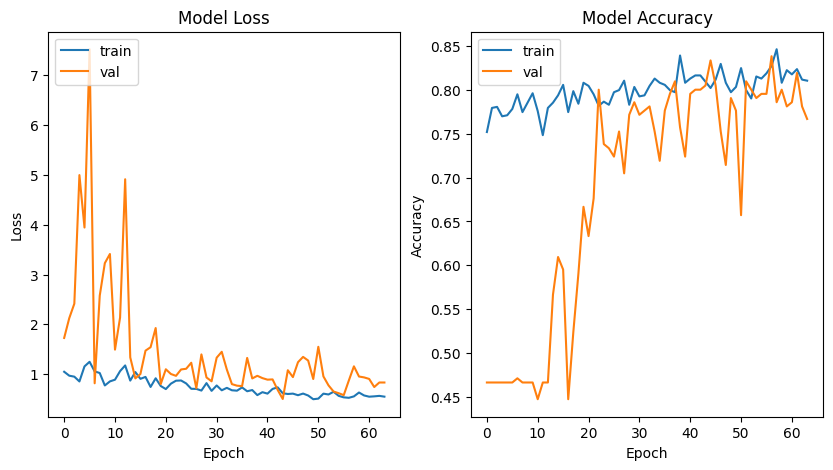

9/9 [==============================] - 5s 449ms/step
[[100  30]
 [ 23 109]]
Specificity:  0.7692307692307693
Sensitivity:  0.8257575757575758
Accuracy:  0.7977099236641222
Precision:  [0.81300813 0.78417266]
Recall:     [0.76923077 0.82575758]
F1score:    [0.79051383 0.80442804]
Iteracion:  2
Epoch 1/150
27/27 [==============================] - 34s 241ms/step - loss: 1.1432 - accuracy: 0.7267 - val_loss: 1.3264 - val_accuracy: 0.5429
Epoch 2/150
27/27 [==============================] - 5s 183ms/step - loss: 1.1211 - accuracy: 0.7542 - val_loss: 1.4232 - val_accuracy: 0.5429
Epoch 3/150
27/27 [==============================] - 5s 182ms/step - loss: 1.3098 - accuracy: 0.7279 - val_loss: 2.3898 - val_accuracy: 0.5429
Epoch 4/150
27/27 [==============================] - 5s 183ms/step - loss: 1.2477 - accuracy: 0.7518 - val_loss: 2.5502 - val_accuracy: 0.5429
Epoch 5/150
27/27 [==============================] - 5s 183ms/step - loss: 1.0921 - accuracy: 0.7482 - val_loss: 3.0904 - val_accurac

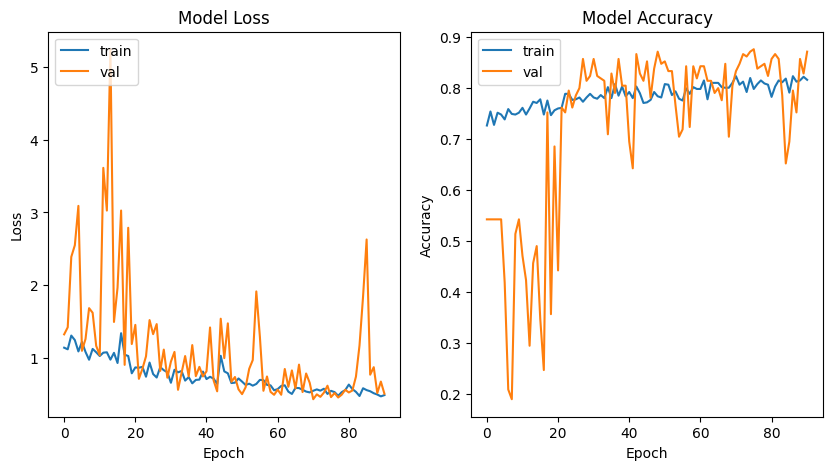

9/9 [==============================] - 5s 427ms/step
[[107  21]
 [ 23 111]]
Specificity:  0.8359375
Sensitivity:  0.8283582089552238
Accuracy:  0.8320610687022901
Precision:  [0.82307692 0.84090909]
Recall:     [0.8359375  0.82835821]
F1score:    [0.82945736 0.83458647]
Iteracion:  3
Epoch 1/150
27/27 [==============================] - 35s 241ms/step - loss: 1.4421 - accuracy: 0.7064 - val_loss: 1.2145 - val_accuracy: 0.4476
Epoch 2/150
27/27 [==============================] - 5s 184ms/step - loss: 0.9498 - accuracy: 0.7733 - val_loss: 2.0478 - val_accuracy: 0.4476
Epoch 3/150
27/27 [==============================] - 5s 181ms/step - loss: 1.0640 - accuracy: 0.7494 - val_loss: 2.3103 - val_accuracy: 0.4476
Epoch 4/150
27/27 [==============================] - 5s 180ms/step - loss: 1.1219 - accuracy: 0.7673 - val_loss: 1.5257 - val_accuracy: 0.4476
Epoch 5/150
27/27 [==============================] - 5s 183ms/step - loss: 0.9819 - accuracy: 0.7625 - val_loss: 2.0659 - val_accuracy: 0.4476

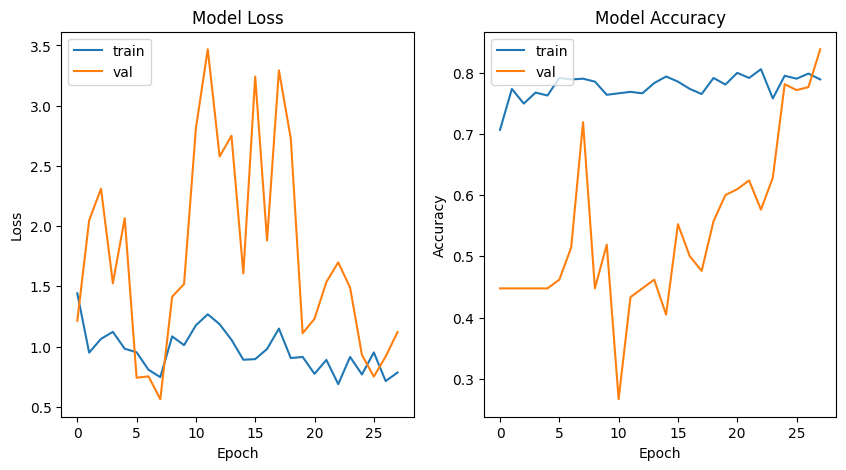

9/9 [==============================] - 5s 410ms/step
[[106  27]
 [ 16 113]]
Specificity:  0.7969924812030075
Sensitivity:  0.875968992248062
Accuracy:  0.8358778625954199
Precision:  [0.86885246 0.80714286]
Recall:     [0.79699248 0.87596899]
F1score:    [0.83137255 0.8401487 ]
Iteracion:  4
Epoch 1/150
27/27 [==============================] - 35s 242ms/step - loss: 1.2884 - accuracy: 0.7434 - val_loss: 2.4048 - val_accuracy: 0.4857
Epoch 2/150
27/27 [==============================] - 5s 183ms/step - loss: 1.0735 - accuracy: 0.7661 - val_loss: 3.1720 - val_accuracy: 0.4857
Epoch 3/150
27/27 [==============================] - 5s 185ms/step - loss: 1.0697 - accuracy: 0.7840 - val_loss: 3.8609 - val_accuracy: 0.4857
Epoch 4/150
27/27 [==============================] - 5s 181ms/step - loss: 1.1091 - accuracy: 0.7506 - val_loss: 5.3710 - val_accuracy: 0.4857
Epoch 5/150
27/27 [==============================] - 5s 183ms/step - loss: 0.9143 - accuracy: 0.7673 - val_loss: 4.1497 - val_accuracy

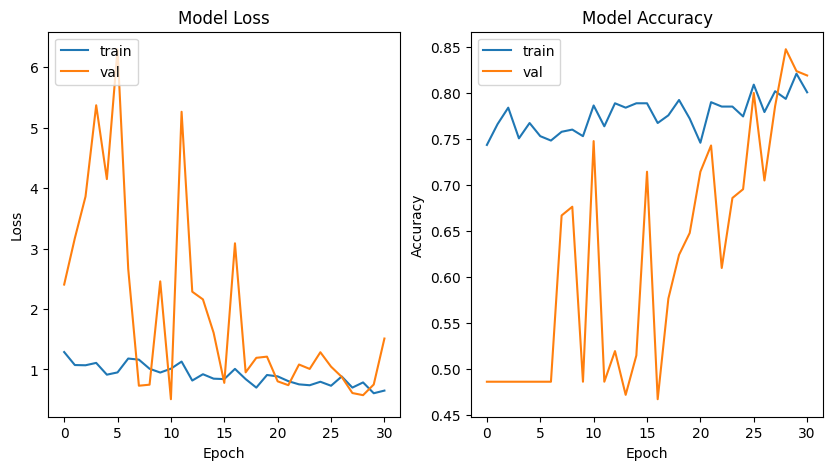

9/9 [==============================] - 6s 509ms/step
[[103  30]
 [ 31  98]]
Specificity:  0.7744360902255639
Sensitivity:  0.7596899224806202
Accuracy:  0.767175572519084
Precision:  [0.76865672 0.765625  ]
Recall:     [0.77443609 0.75968992]
F1score:    [0.77153558 0.76264591]
Iteracion:  5
Epoch 1/150
27/27 [==============================] - 35s 240ms/step - loss: 1.0151 - accuracy: 0.7649 - val_loss: 1.5875 - val_accuracy: 0.4714
Epoch 2/150
27/27 [==============================] - 5s 188ms/step - loss: 1.1369 - accuracy: 0.7697 - val_loss: 2.2359 - val_accuracy: 0.4714
Epoch 3/150
27/27 [==============================] - 5s 184ms/step - loss: 1.1248 - accuracy: 0.7542 - val_loss: 2.8413 - val_accuracy: 0.4714
Epoch 4/150
27/27 [==============================] - 5s 190ms/step - loss: 1.0462 - accuracy: 0.7649 - val_loss: 0.7653 - val_accuracy: 0.5286
Epoch 5/150
27/27 [==============================] - 5s 182ms/step - loss: 1.5336 - accuracy: 0.7566 - val_loss: 3.2517 - val_accuracy

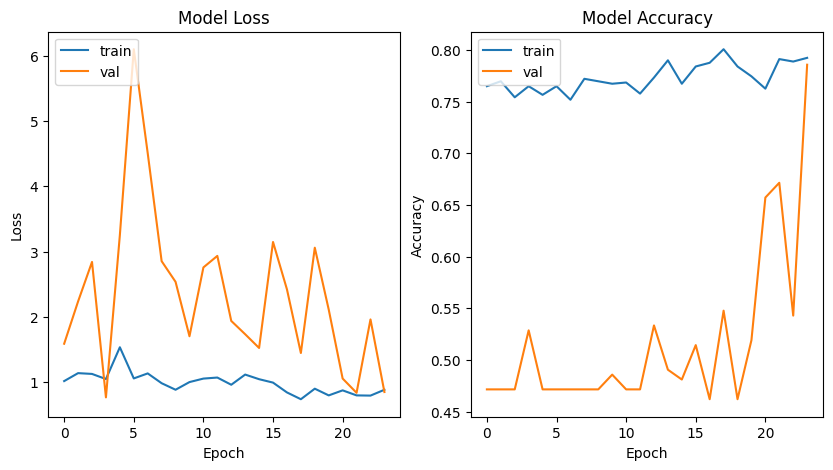

9/9 [==============================] - 5s 459ms/step
[[  0 132]
 [  0 130]]
Specificity:  0.0
Sensitivity:  1.0
Accuracy:  0.4961832061068702
Precision:  [0.         0.49618321]
Recall:     [0. 1.]
F1score:    [0.         0.66326531]
Media
Specificity:  0.6353193681318682  |  Sensitivity:  0.8579549398882964
Accuracy:  0.7458015267175573  |  Precision:  0.6967627044621849  |  Recall:  0.7466371540100822  |  F1score:  0.7127953757727084

Desviacion
Specificity:  0.3185285718921347  |  Sensitivity:  0.08008739672330434
Accuracy:  0.12729107773963189  |  Precision:  0.2520529289854687  |  Recall:  0.25754391968285195  |  F1score:  0.24282198670269287


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

HOLDOUT = 5

specVec,sensVec,accuVec,precVec,recVec,f1Vec=[],[],[],[],[],[]

for i in range(HOLDOUT):
  print("Iteracion: ",i+1)
  #Conjutnos de Train, Validation y Test
  x_trainPath, x_testPath, y_trainPath, y_testPath = train_test_split(data, data['DIAGN'], test_size=0.2)
  x_trainPath, x_valPath, y_trainPath, y_valPath = train_test_split(x_trainPath, y_trainPath, test_size=0.2)

  y_trainPath = np.array(y_trainPath)
  y_testPath = np.array(y_testPath)
  y_valPath = np.array(y_valPath)

  #Cargar los path de las imagenes para el pipeline
  dataPathDrive = '/content/drive/MyDrive/Colab Notebooks/CITOBOT/DATASET/'
  path_train = dataPathDrive + x_trainPath["PATH"] + x_trainPath['IMAGE_ID']
  path_test = dataPathDrive + x_testPath["PATH"] + x_testPath['IMAGE_ID']
  path_val = dataPathDrive + x_valPath["PATH"] + x_valPath['IMAGE_ID']

  path_train = np.array(path_train)
  path_test = np.array(path_test)
  path_val = np.array(path_val)

  #Convertir en tensores
  data_train = tf.data.Dataset.from_tensor_slices(path_train)
  data_test = tf.data.Dataset.from_tensor_slices(path_test)
  data_val = tf.data.Dataset.from_tensor_slices(path_val)

  #Procesar y Cargar Imagenes
  data_train = data_train.map(process_image)
  data_test = data_test.map(process_image)
  data_val = data_val.map(process_image)

  train = tf.data.Dataset.from_tensor_slices(to_categorical(y_trainPath, 2))
  train = tf.data.Dataset.zip((data_train,train))

  test = tf.data.Dataset.from_tensor_slices(to_categorical(y_testPath, 2))
  test = tf.data.Dataset.zip((data_test,test))

  val = tf.data.Dataset.from_tensor_slices(to_categorical(y_valPath, 2))
  val = tf.data.Dataset.zip((data_val,val))

  AS = train.batch(batch_size=32)
  AST = test.batch(batch_size=32)
  ASV = val.batch(batch_size=32)

  #Aplicar aumento de datos
  x_train = np.array(list(data_train.as_numpy_iterator()))
  y_train = np.array(list(train.as_numpy_iterator()), dtype=object)
  y_train = np.array([y[1] for y in y_train])

  x_val = np.array(list(data_val.as_numpy_iterator()))
  y_val = np.array(list(val.as_numpy_iterator()), dtype=object)
  y_val = np.array([y[1] for y in y_val])

  data_gen_train = datagen.flow(x_train, y_train, batch_size=32)
  data_gen_val = datagen.flow(x_val, y_val, batch_size=32)

  #Cargar Modelo
  model = modelCompile()

  #Entrenar
  callbackMed=tf.keras.callbacks.EarlyStopping(
      monitor='val_loss',
      min_delta=0,
      patience=20,
      verbose=0,
      mode='auto',
      baseline=None,
      restore_best_weights=True
  )

  history = model.fit(data_gen_train, epochs=150, verbose=1, validation_data= data_gen_val, callbacks=[callbackMed,TensorBoard(log_dir='./cnntmp/log')])

  #Grafica Rendimiento ========================================
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

  ax1.plot(history.history['loss'])
  ax1.plot(history.history['val_loss'])
  ax1.set_title('Model Loss')
  ax1.set_ylabel('Loss')
  ax1.set_xlabel('Epoch')
  ax1.legend(['train', 'val'], loc='upper left')

  ax2.plot(history.history['accuracy'])
  ax2.plot(history.history['val_accuracy'])
  ax2.set_title('Model Accuracy')
  ax2.set_ylabel('Accuracy')
  ax2.set_xlabel('Epoch')
  ax2.legend(['train', 'val'], loc='upper left')
  plt.show()
  #===========================================================

  model.evaluate(AST)
  pred = model.predict(AST)

  y_testPath = list(y_testPath)
  pred_label=[np.argmax(pred[i]) for i in range(pred.shape[0])]

  mat=confusion_matrix(y_testPath, pred_label)

  tn, fp, fn, tp = mat.ravel()

  specificity = tn / (tn + fp)

  sensitivity = tp / (tp + fn)

  specVec.append(specificity)
  sensVec.append(sensitivity)
  accuVec.append(accuracy_score(y_testPath,pred_label))
  precVec.append(precision_score(y_testPath,pred_label,average=None,zero_division=0))
  recVec.append(recall_score(y_testPath,pred_label,average=None,zero_division=0))
  f1Vec.append(f1_score(y_testPath,pred_label,average=None,zero_division=0))

  print(mat)
  print("Specificity: ",specificity)
  print("Sensitivity: ",sensitivity)
  print("Accuracy: ",accuracy_score(y_testPath,pred_label))
  print("Precision: ",precision_score(y_testPath,pred_label,average=None,zero_division=0))
  print("Recall:    ",recall_score(y_testPath,pred_label,average=None,zero_division=0))
  print("F1score:   ",f1_score(y_testPath,pred_label,average=None,zero_division=0))
  print("=====================================")

print("Media")
print("Specificity: ",np.mean(specVec)," | ","Sensitivity: ",np.mean(sensVec))
print("Accuracy: ",np.mean(accuVec)," | ","Precision: ",np.mean(precVec)," | ","Recall: ",np.mean(recVec)," | ","F1score: ",np.mean(f1Vec))
print()
print("Desviacion")
print("Specificity: ",np.std(specVec)," | ","Sensitivity: ",np.std(sensVec))
print("Accuracy: ",np.std(accuVec)," | ","Precision: ",np.std(precVec)," | ","Recall: ",np.std(recVec)," | ","F1score: ",np.std(f1Vec))

In [16]:
#import tensorflow as tf

#converter = tf.lite.TFLiteConverter.from_keras_model(model)
#tflite_model = converter.convert()

#with open("model.tflite", 'wb') as f:
#  f.write(tflite_model)